# **Assignment 2 - AUTO_ML**

Authored by Anouksha Sreemurthy for AI SkunkWorks

**About Dataset**

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Dataset Link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

**Data Dictionary:**

Booking_ID: unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.


**What is AutoML?**
Automactic Machine Learning or AutoML refers to the automation of various tasks in the machine learning pipeline, including data preprocessing, hyperparameter tuning, model selection, and evaluation.

In [ ]:
#Importing required packages
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import seaborn as sns
import pprint
import operator
import matplotlib
import pandas as pd
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import matplotlib.pyplot as plt
import csv
import optparse
import time
import psutil
import json
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Initializing the H2o clusters
h2o.init(strict_version_check=False)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,15 mins 27 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_igdbt6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.171 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


**Load the dataset as a H2OFrame**

In [ ]:
data = h2o.import_file('https://raw.githubusercontent.com/AnoukshaKS/AnoukshaKS-ML_AutoML/main/Hotel%20Reservations.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.head()

Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.5,0,Canceled
INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115,1,Canceled
INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.9,1,Not_Canceled
INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


**Describe the dataset**

In [ ]:
data.describe(chunk_summary=True)
# H2O provides sample data along with basic summary statistics for numerical columns.

Rows:36275
Cols:19

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
CBS           Binary                     8        5.26316             5.0 KB    0.502352
CXI           Sparse Integers            40       26.3158             22.0 KB   2.22194
C1N           1-Byte Integers (w/o NAs)  72       47.3684             323.6 KB  32.6658
C1S           1-Byte Fractions           8        5.26316             36.1 KB   3.64215
C2            2-Byte Integers            8        5.26316             71.4 KB   7.20543
C2S           2-Byte Fractions           8        5.26316             71.5 KB   7.21805
CStr          Strings                    8        5.26316             461.1 KB  46.5443

Frame distribution summary: 
                 size      number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  --------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  990.7 KB  36275             8                              152
mean             990.7 KB  36275             8                              152
min              990.7 KB  36275             8                              152
max              990.7 KB  36275             8                              152
stddev           0  B      0                 0                              0
total            990.7 KB  36275             8                              152

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
type,string,int,int,int,int,enum,int,enum,int,int,int,int,enum,int,int,int,real,int,enum
mins,NaN,0.0,0.0,0.0,0.0,,0.0,,0.0,2017.0,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,
mean,NaN,1.8449620951068242,0.10527911784975878,0.8107236388697451,2.2043004824259134,,0.0309855272226051,,85.2325568573398,2017.8204272915223,7.4236526533425256,15.596995175740874,,0.02563749138525155,0.023349414197105445,0.15341144038594073,103.42353907649901,0.6196554100620266,
maxs,NaN,4.0,10.0,7.0,17.0,,1.0,,443.0,2018.0,12.0,31.0,,1.0,13.0,58.0,540.0,5.0,
sigma,NaN,0.5187148379012902,0.402648063589278,0.8706436147599999,1.4109048548240162,,0.17328084736891503,,85.93081669923257,0.3838364395590681,3.0698944112257682,8.7404473686329,,0.15805346903513284,0.36833144791978767,1.7541707114426388,35.089424036370346,0.7862358983956066,
zeros,0,139,33577,16872,2387,,35151,,1297,0,0,0,,35345,35937,35463,545,19777,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,INN00001,2.0,0.0,1.0,2.0,Meal Plan 1,0.0,Room_Type 1,224.0,2017.0,10.0,2.0,Offline,0.0,0.0,0.0,65.0,0.0,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.0,0.0,Canceled


In [ ]:
min_mem_size=6 
run_time=222

* The minimum amount of memory that must be allotted to the H2O cluster is specified by min mem size.
* The maximum runtime (in seconds) for the AutoML method to find the optimal model is specified by the run time parameter.
* This option aids in reducing the amount of time the algorithm spends looking for the optimum model, which may be both resource- and time-intensive.

In [ ]:
from distutils.util import strtobool
import psutil
pct_memory = 0.5 
# This line sets the H2O cluster's memory utilization percentage to 50%. (0.5).
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)
# The available memory is then divided by the amount of gigabytes in a byte (1073741824) and rounded to the closest integer. The available memory is then obtained from the psutil library using the virtual memory() function.


3


The minimum amount of memory (measured in gigabytes) that must be allotted to the H2O cluster is specified by min mem size.

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [ ]:
data_for_corr = pd.read_csv('https://raw.githubusercontent.com/AnoukshaKS/AnoukshaKS-ML_AutoML/main/Hotel%20Reservations.csv')

# **Heat map of the correlation**

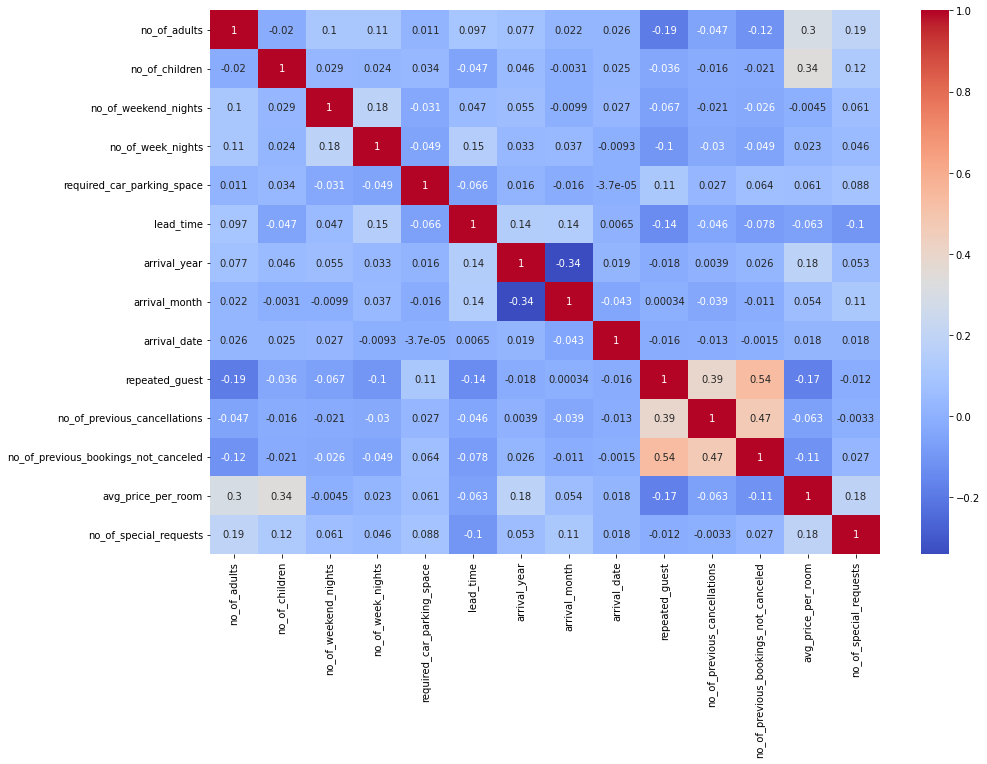

In [ ]:
# Heatmap showing correlation between the attributes.
import matplotlib.pyplot as plt
# Create a figure with a specified size
fig, cmap = plt.subplots(figsize=(15, 10))

# Generate the heatmap
sns.heatmap(data_for_corr.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

**Correlation Analysis**

The correlation heatmap shows that there is little to no correlation between the independent variables. This indicates that each variable is independent of the others. The closer the values are to 1 and -1, the more positively or negatively correlated the two features are.

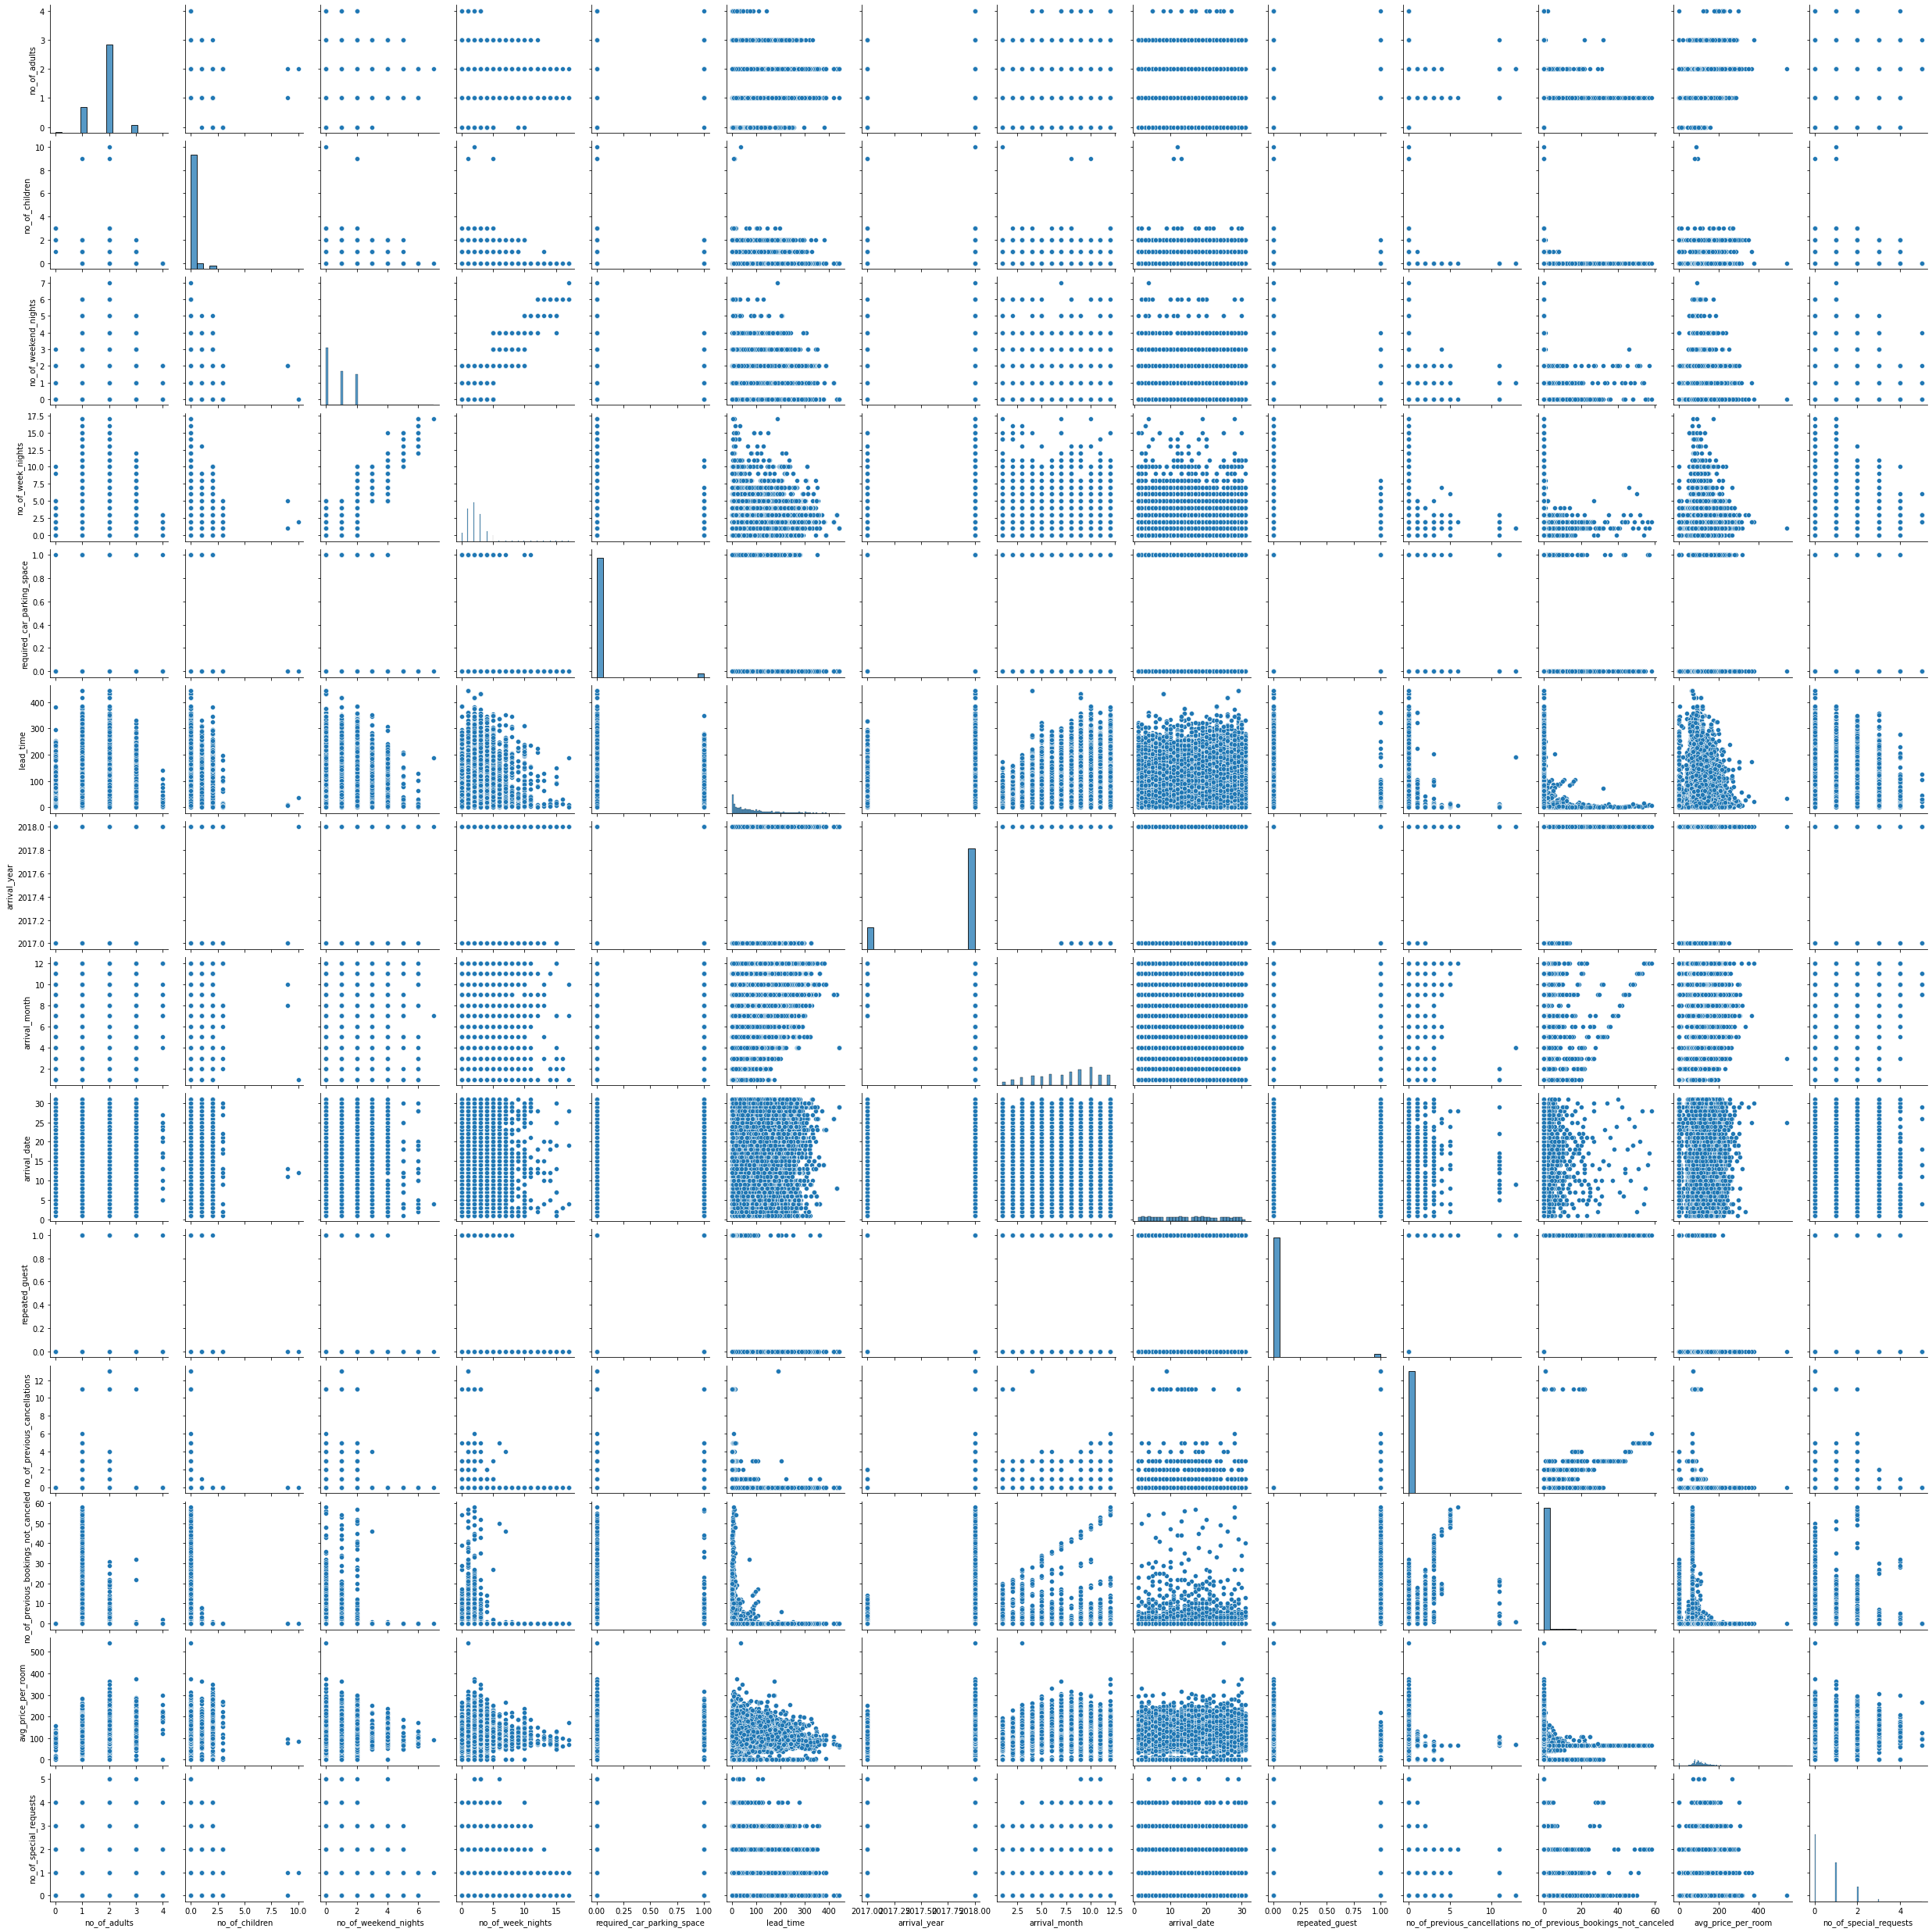

In [ ]:
#plotting a grid of sctter plot
sns.pairplot(
   data_for_corr
)
# A pair plot is a graphical representation of pairwise relationships between variables in a dataset. It displays scatter plots for each pair of variables

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [ ]:
# The leader board for all the models and ranking them by their performance
lb = aml.leaderboard
# We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well. 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
import statsmodels.api as sm

# Generate some sample data
np.random.seed(1)
n = 100
x = np.random.normal(size=n)
Y = 2*x + np.random.normal(size=n)

# Fit the linear regression model
model = sm.OLS(Y, sm.add_constant(x)).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           5.39e-36
Time:                        02:15:03   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.1

# **Initialize the H2O cluster**

In [ ]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:28020..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwc2f5h79
  JVM stdout: /tmp/tmpwc2f5h79/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpwc2f5h79/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:28020
Connecting to H2O server at http://127.0.0.1:28020 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_x1960t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
data = h2o.import_file('https://raw.githubusercontent.com/AnoukshaKS/AnoukshaKS-ML_AutoML/main/Hotel%20Reservations.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.types

{'Booking_ID': 'string',
 'no_of_adults': 'int',
 'no_of_children': 'int',
 'no_of_weekend_nights': 'int',
 'no_of_week_nights': 'int',
 'type_of_meal_plan': 'enum',
 'required_car_parking_space': 'int',
 'room_type_reserved': 'enum',
 'lead_time': 'int',
 'arrival_year': 'int',
 'arrival_month': 'int',
 'arrival_date': 'int',
 'market_segment_type': 'enum',
 'repeated_guest': 'int',
 'no_of_previous_cancellations': 'int',
 'no_of_previous_bookings_not_canceled': 'int',
 'avg_price_per_room': 'real',
 'no_of_special_requests': 'int',
 'booking_status': 'enum'}

In [ ]:
data.shape

(36275, 19)

In [ ]:
#Cleaning the data
missing_values = data.isna().sum()
print(missing_values)

0.0


In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = data.split_frame([pct_rows])

In [ ]:
print(data_train.shape)
print(data_test.shape)

(28913, 19)
(7362, 19)


In [ ]:
#Display all columns in X
X=data.columns
print(X)

['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [ ]:
#Seperate Dependent variable from Independent variable
y_numeric ='booking_status'
X.remove(y_numeric) 
print(X)


['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [ ]:
aml.train(x=X, y=y_numeric, training_frame=data_train)  # Trainig the dataset on different models

AutoML progress: |
02:15:23.417: _train param, Dropping bad and constant columns: [Booking_ID]

█████████████████
02:16:22.896: _train param, Dropping bad and constant columns: [Booking_ID]

█████
02:16:40.634: _train param, Dropping bad and constant columns: [Booking_ID]

████████████████████
02:17:51.366: _train param, Dropping unused columns: [Booking_ID]

█
02:17:56.669: _train param, Dropping bad and constant columns: [Booking_ID]

███
02:18:07.884: _train param, Dropping bad and constant columns: [Booking_ID]

████
02:18:18.900: _train param, Dropping bad and constant columns: [Booking_ID]

██
02:18:29.193: _train param, Dropping bad and constant columns: [Booking_ID]

███
02:18:39.536: _train param, Dropping bad and constant columns: [Booking_ID]

████
02:18:51.897: _train param, Dropping unused columns: [Booking_ID]

█
02:18:54.958: _train param, Dropping unused columns: [Booking_ID]

█
02:18:58.541: _train param, Dropping bad and constant columns: [Booking_ID]


02:19:00.986: 

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/8
# GBM base models (used / total),2/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


array([[<AxesSubplot:title={'center':'no_of_adults'}>,
        <AxesSubplot:title={'center':'no_of_children'}>,
        <AxesSubplot:title={'center':'no_of_weekend_nights'}>,
        <AxesSubplot:title={'center':'no_of_week_nights'}>],
       [<AxesSubplot:title={'center':'required_car_parking_space'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_year'}>,
        <AxesSubplot:title={'center':'arrival_month'}>],
       [<AxesSubplot:title={'center':'arrival_date'}>,
        <AxesSubplot:title={'center':'repeated_guest'}>,
        <AxesSubplot:title={'center':'no_of_previous_cancellations'}>,
        <AxesSubplot:title={'center':'no_of_previous_bookings_not_canceled'}>],
       [<AxesSubplot:title={'center':'avg_price_per_room'}>,
        <AxesSubplot:title={'center':'no_of_special_requests'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

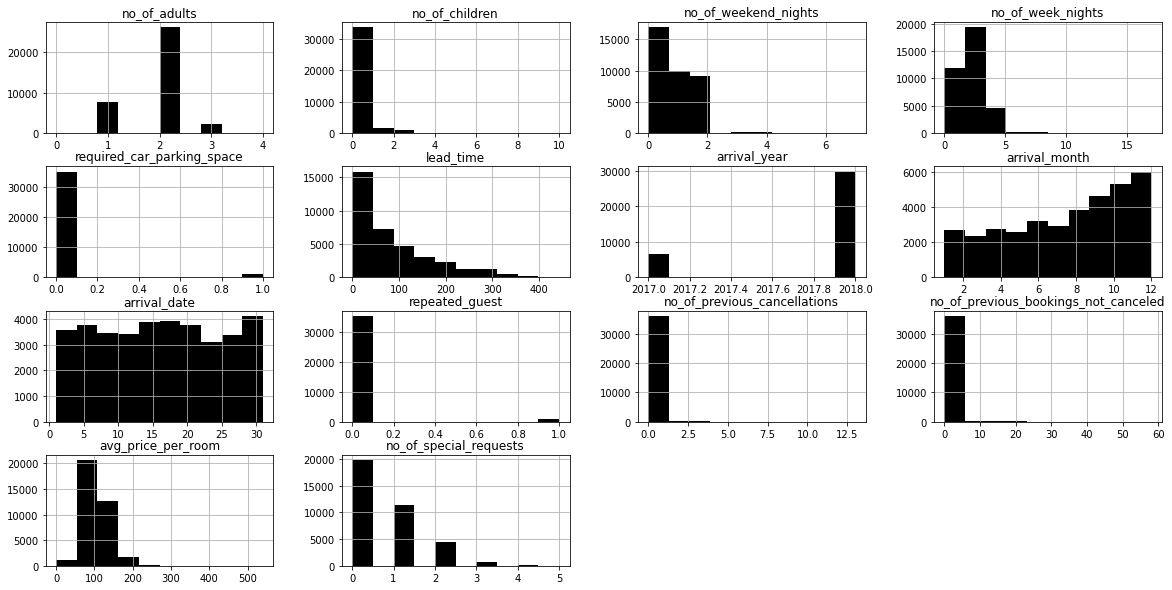

In [ ]:
data_for_corr.hist(color="black", figsize=(20, 10))  # Plotted Histogram

In [ ]:
all_pred = aml.leader.predict(data_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
all_pred.head(10)

predict,Canceled,Not_Canceled
Canceled,0.935099,0.064901
Not_Canceled,0.0830081,0.916992
Not_Canceled,0.213876,0.786124
Not_Canceled,0.00714586,0.992854
Canceled,0.779693,0.220307
Not_Canceled,0.0217299,0.97827
Not_Canceled,0.217053,0.782947
Not_Canceled,0.00207059,0.997929
Not_Canceled,0.138265,0.861735
Not_Canceled,0.00127796,0.998722


In [ ]:
leaderboard = print(
    aml.leaderboard
) 

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_1_AutoML_1_20230301_21522     0.951555   0.254349  0.974345                0.13537   0.281351  0.0791586
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_21522  0.951279   0.255253  0.974159                0.137865  0.281788  0.0794043
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_21522  0.949461   0.26072   0.97338                 0.145098  0.285063  0.0812611
GBM_1_AutoML_1_20230301_21522                           0.949084   0.262621  0.973198                0.14823   0.28573   0.0816418
DRF_1_AutoML_1_20230301_21522                           0.944875   0.382199  0.966349                0.135729  0.285302  0.0813973
XGBoost_1_AutoML_1_20230301_21522                       0.944261   0.273527  0.970056                0.155564  0.291372  0.0848978
XGBoost_2_AutoML_1_20230301_21522                       0.944051   0.276746  0.9702

In [ ]:
print(aml.leader)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230301_21522


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  5/8
# GBM base models (used / total)      2/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0545977331323644
RMSE: 0.2336615782116615
LogLoss: 0.18336712580494446
AUC: 0.9806490254919664
AUCPR: 0.9909502997470979
Gini: 0.9612980509839328
Null degrees of freedom: 10066
Residual degrees of fr

In [ ]:
best_model = aml.leader
best_model.model_performance(data_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.07522891740062737
RMSE: 0.27427890440321395
LogLoss: 0.24398825840257704
AUC: 0.9555416949859693
AUCPR: 0.9766724448676293
Gini: 0.9110833899719386
Null degrees of freedom: 7361
Residual degrees of freedom: 7356
Null deviance: 9284.115376486023
Residual deviance: 3592.4831167195443
AIC: 3604.4831167195443

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4412016860525133
              Canceled    Not_Canceled    Error    Rate
------------  ----------  --------------  -------  --------------
Canceled      1862        530             0.2216   (530.0/2392.0)
Not_Canceled  230         4740            0.0463   (230.0/4970.0)
Total         2092        5270            0.1032   (760.0/7362.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.441202     0.925781  249
max f2                       0.228171     0.95648   319
max f0point5                 0.732383     0.930095  156
max accuracy                 0.512035     0.89799   230
max precision                0.999462     1         0
max recall                   0.0647763    1         368
max specificity              0.999462     1         0
max absolute_mcc             0.512035     0.76443   230
max min_per_class_accuracy   0.679017     0.881271  174
max mean_per_class_accuracy  0.689423     0.882681  171
max tns                      0.999462     2392      0
max fns                      0.999462     4864      0
max fps                      0.00106427   2392      399
max tps                      0.0647763    4970      368
max tnr                      0.999462     1         0
max fnr                      0.999462     0.978672  0
max fpr                      0.00106427   1         399
max tpr                      0.0647763    1         368

Gains/Lift Table: Avg response rate: 67.51 %, avg score: 67.03 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100516                   0.999358           1.48129   1.48129            1                0.999537    1                           0.999537            0.0148893       0.0148893                  48.1288   48.1288            0.0148893
2        0.0201032                   0.999106           1.48129   1.48129            1                0.999227    1                           0.999382            0.0148893       0.0297787                  48.1288   48.1288            0.0297787
3        0.030019                    0.998978           1.48129   1.48129            1                0.999066    1                           0.999278            0.0146881       0.0444668                  48.1288   48.1288            0.0444668
4        0.0400706                   0.998725           1.48129   1.48129            1                0.998845    1                           0.999169            0.0148893       0.0593561                  48.1288   48.1288            0.0593561
5        0.0509372                   0.99852            1.48129   1.48129            1                0.998604    1                           0.999049            0.0160966       0.0754527                  48.1288   48.1288            0.0754527
6        0.100109                    0.99773            1.48129   1.48129            1                0.998141    1                           0.998603            0.072837        0.14829                    48.1288   48.1288            0.14829
7        0.

In [ ]:
# Getting the name of the best model
best_model_name = best_model.model_id

# Print the name of the best model
print("The best model is:", best_model_name)

The best model is: StackedEnsemble_AllModels_1_AutoML_1_20230301_21522


The methods used by the top three models on the leaderboard to make predictions vary. The first two models, called ensemble models, incorporate several models, whereas the third model, called a Gradient Boosting Method (GBM), uses just one model.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

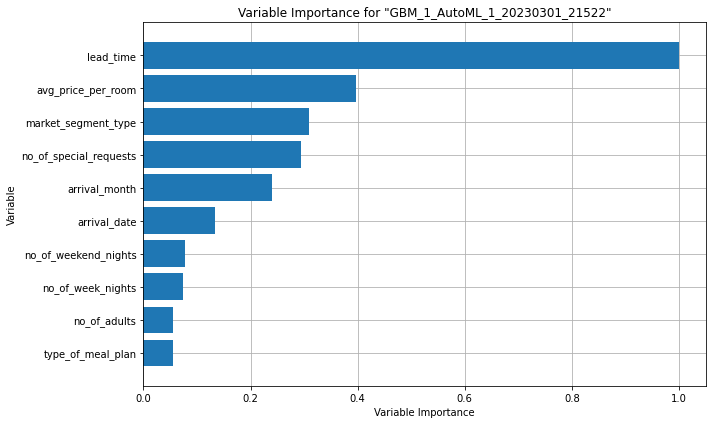

In [ ]:
best_mod = aml.explain(frame = data_test, figsize = (10,6),include_explanations=['varimp'])

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

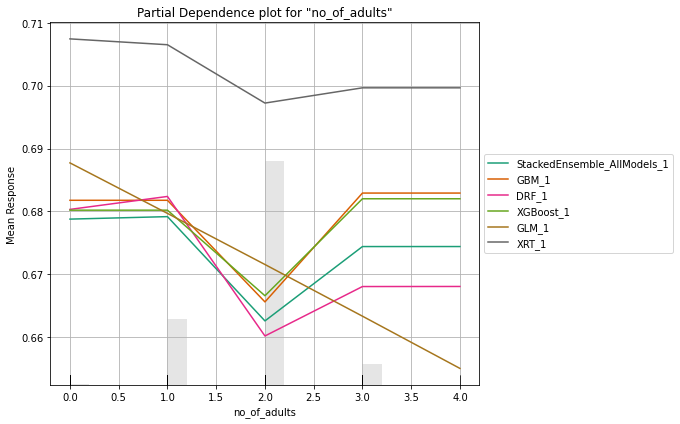

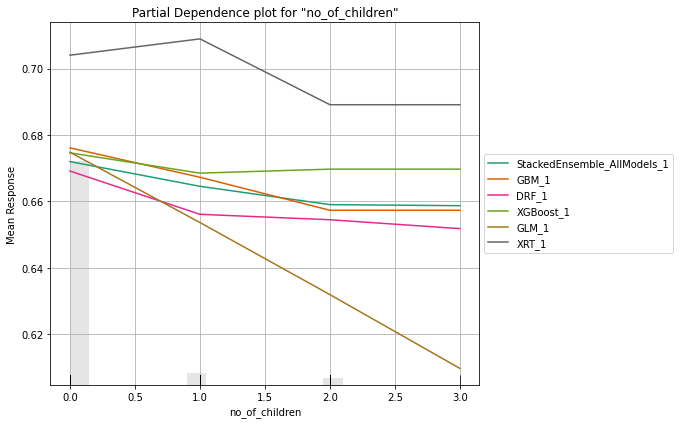

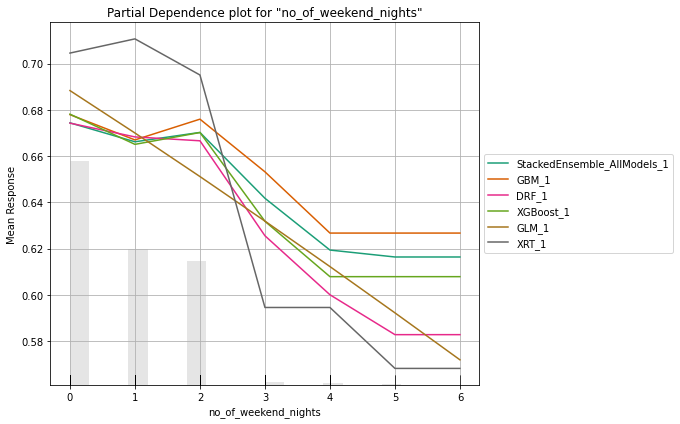

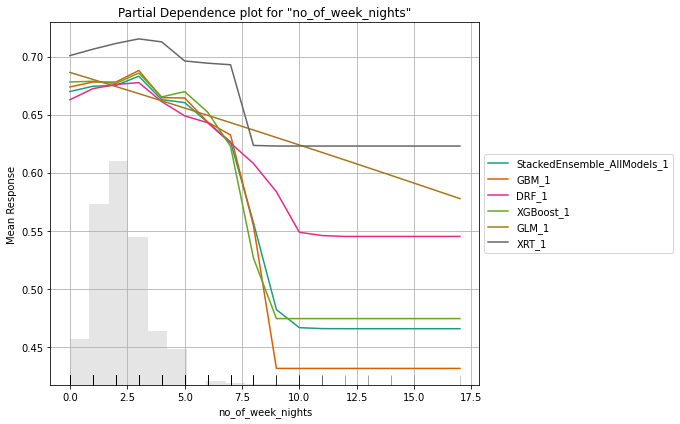

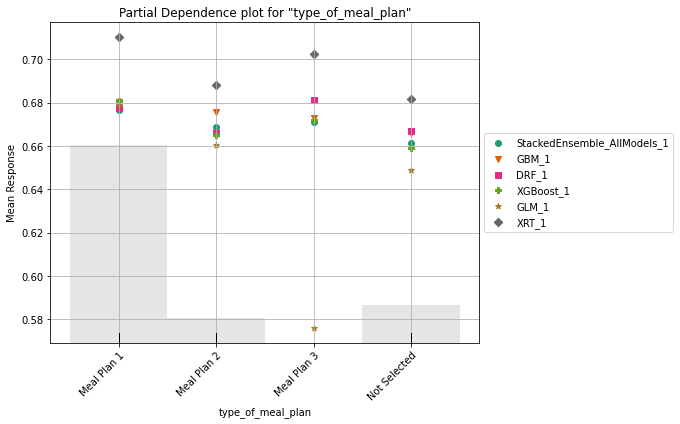

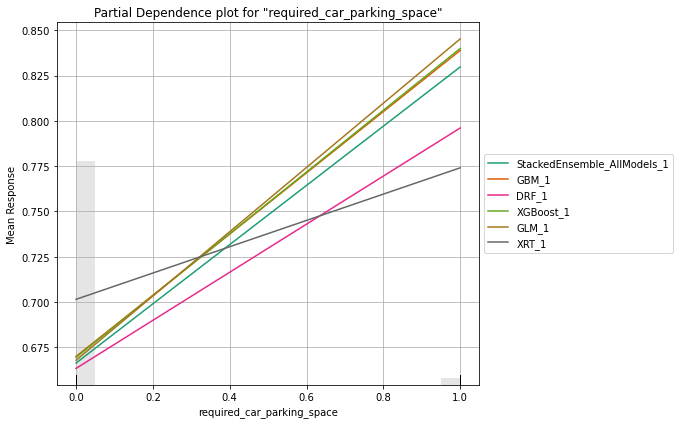

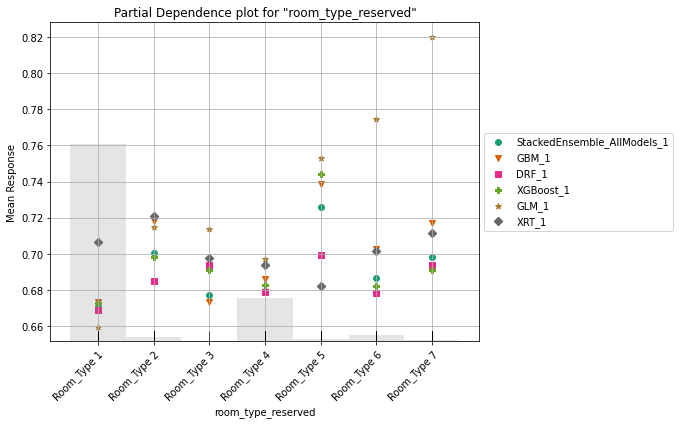

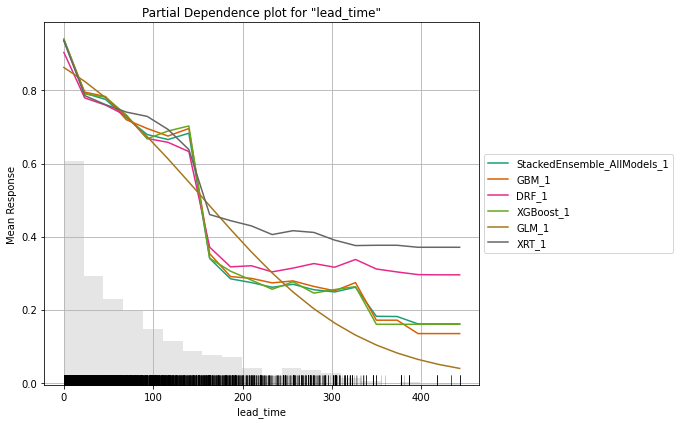

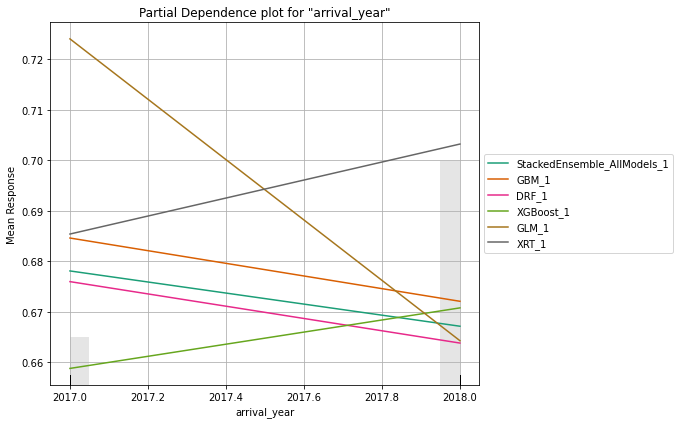

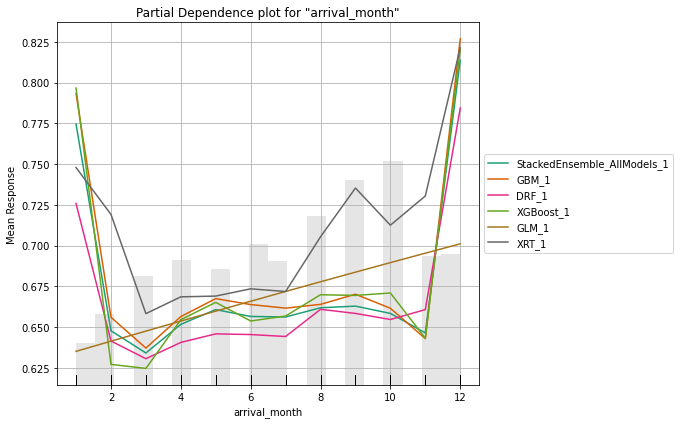

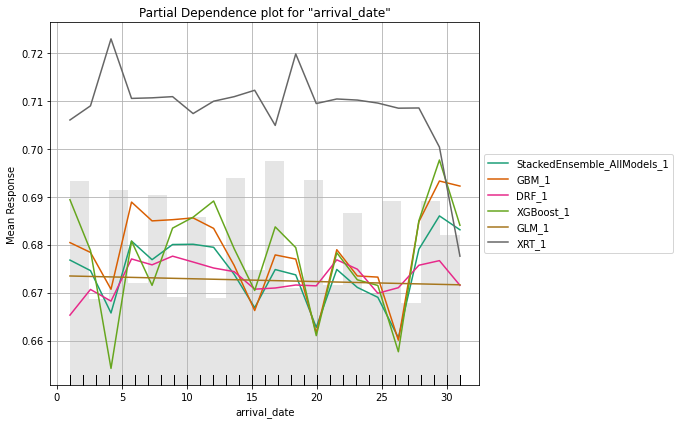

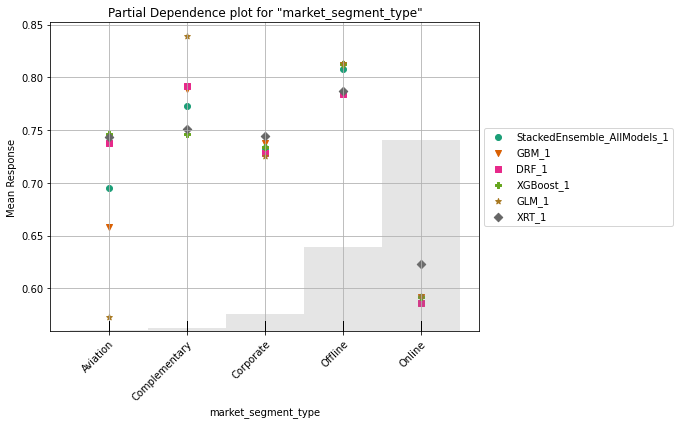

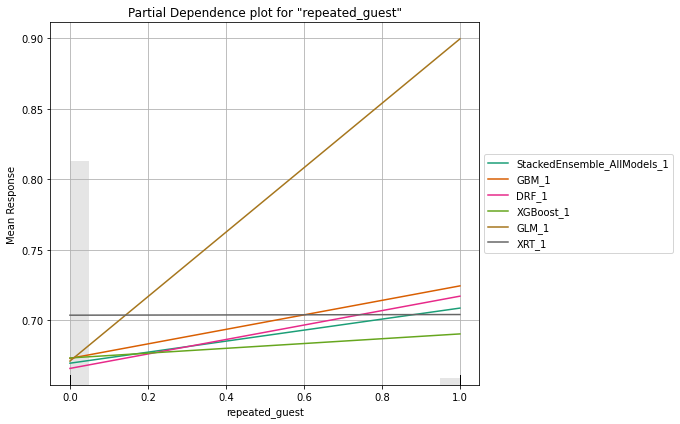

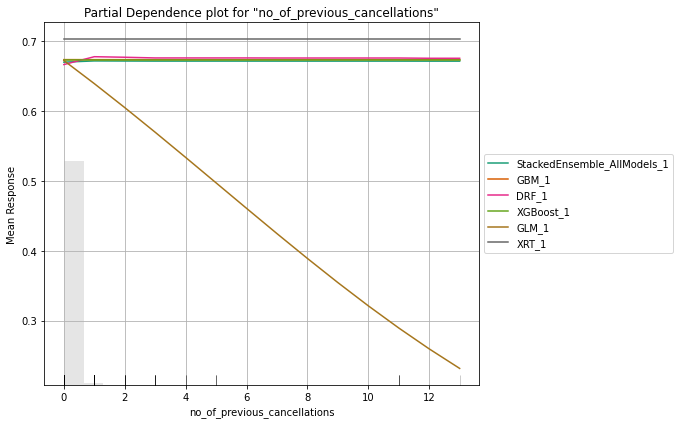

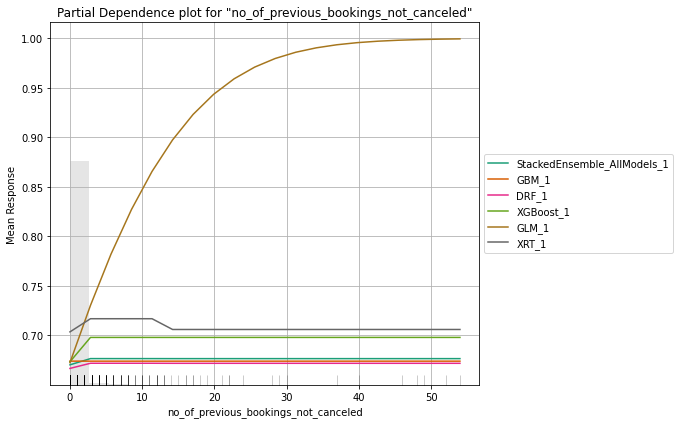

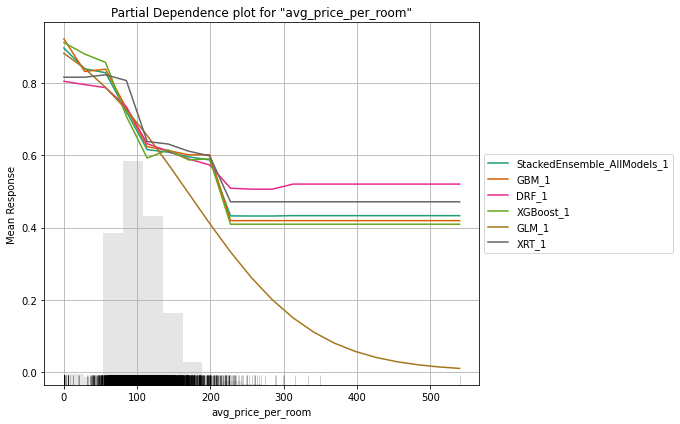

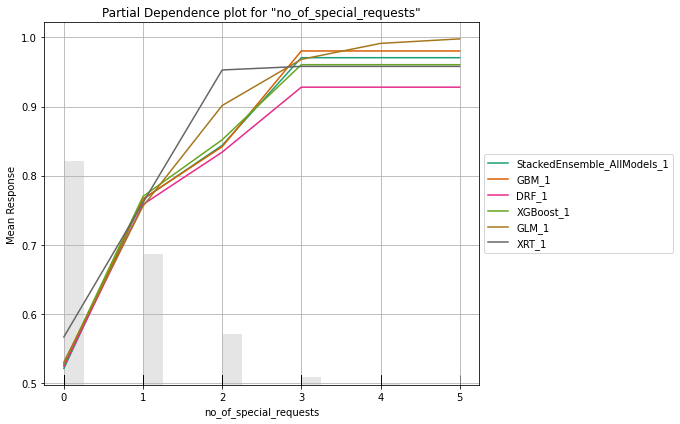

In [ ]:
explain_model = aml.explain(frame = data_test, figsize = (10,6),include_explanations=['pdp'])

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

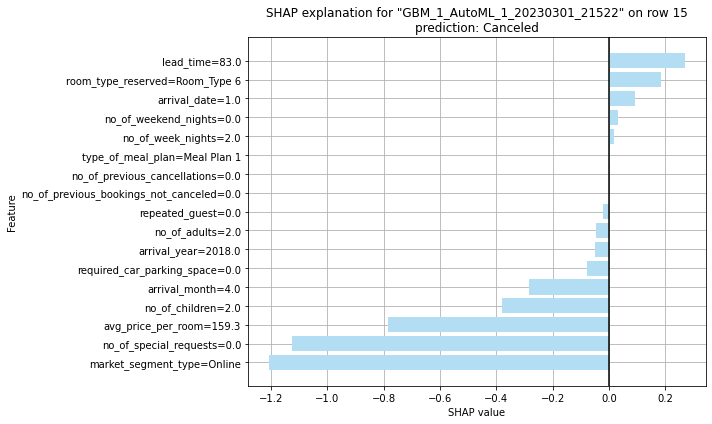

In [ ]:
shap_mod = aml.explain_row(frame = data_test, row_index = 15, figsize = (10,6), exclude_explanations = "leaderboard")

The feature's influence on the prediction, whether positive or negative, is shown by its location on the SHAP value axis. In other words, the effect of a data point increases with the distance between it and the shap value of 0.0. .

In [ ]:
#Suppose we have a data set with two variables, x and y, and we want to model the relationship between them using a linear regression.
# We can use the ols() function from the statsmodels library to fit the model and obtain the p-values for the coefficients.
import statsmodels.api as sm
import numpy as np

# Generate some sample data
np.random.seed(1)
n = 100

x = np.random.normal(size=n)
Y = 2*x + np.random.normal(size=n)

# Fit the linear regression model
model = sm.OLS(Y, sm.add_constant(x)).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           5.39e-36
Time:                        02:22:45   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.1

In [ ]:
# Define the target variable
target = 'booking_status'

# Specify the predictor variables
predictors = data.col_names[:-1]

# Run the AutoML process
aml = H2OAutoML(max_models=5, seed=123, max_runtime_secs=3600, sort_metric='AUC')

# Train and validate the models on the training set
aml.train(y=target, x=predictors, training_frame=data_train)

# Evaluate the models on the testing set
performance = aml.leader.model_performance(test_data=data_test)

# Print the performance of the best model
print(performance)


AutoML progress: |
02:22:45.742: _train param, Dropping bad and constant columns: [Booking_ID]

██
02:23:34.251: _train param, Dropping bad and constant columns: [Booking_ID]

███████
02:23:52.587: _train param, Dropping bad and constant columns: [Booking_ID]

███
02:25:17.577: _train param, Dropping bad and constant columns: [Booking_ID]

█████
02:26:02.253: _train param, Dropping bad and constant columns: [Booking_ID]

██
02:26:38.904: _train param, Dropping unused columns: [Booking_ID]

███
02:27:07.971: _train param, Dropping unused columns: [Booking_ID]

████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.06999512789405844
RMSE: 0.26456592353146774
LogLoss: 0.23176135389853644
AUC: 0.9596910476235339
AUCPR: 0.9781804730459406
Gini: 0.9193820952470677
Null degrees of freedom: 7361
Residual degrees of freedom: 7358
Null deviance: 9284.115376486023
Residual deviance: 3412.454174802051
AIC: 3420.4541748020

**Multicollinearity of the model**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

z = data_for_corr[['no_of_special_requests','no_of_adults','no_of_children','no_of_weekend_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["booking_status"] = z.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(z.values, i)
                          for i in range(len(z.columns))]
  
print(vif_data)

                          booking_status        VIF
0                 no_of_special_requests   1.795216
1                           no_of_adults  16.390573
2                         no_of_children   1.241653
3                   no_of_weekend_nights   1.909027
4             required_car_parking_space   1.061579
5                              lead_time   2.140018
6                           arrival_year  28.229762
7                          arrival_month   7.156317
8                           arrival_date   4.203034
9                         repeated_guest   1.591821
10          no_of_previous_cancellations   1.337654
11  no_of_previous_bookings_not_canceled   1.603663
12                    avg_price_per_room  12.750413


In [ ]:
# Remove columns with infinite VIF
vif_data = vif_data.replace([np.inf, -np.inf], np.nan).dropna()

# Print the updated VIF dataframe
print(vif_data)

                          booking_status        VIF
0                 no_of_special_requests   1.795216
1                           no_of_adults  16.390573
2                         no_of_children   1.241653
3                   no_of_weekend_nights   1.909027
4             required_car_parking_space   1.061579
5                              lead_time   2.140018
6                           arrival_year  28.229762
7                          arrival_month   7.156317
8                           arrival_date   4.203034
9                         repeated_guest   1.591821
10          no_of_previous_cancellations   1.337654
11  no_of_previous_bookings_not_canceled   1.603663
12                    avg_price_per_room  12.750413


**REGULARIZATION** 

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

drug_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
drug_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
drug_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
drug_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search


In [ ]:
#Display all columns in X
X=data.columns
print(X)
print(y_numeric)

['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']
booking_status


In [ ]:
#Seperate Dependent variable from Independent variable
y_numeric ='booking_status'
X.remove(y_numeric) 
print(X)


['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


# **Regularization:**

In [92]:
# Identify categorical columns
# Train Lasso model
lasso_model = h2o.estimators.glm.H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1.0,  # Set alpha to 1 for L1 regularization (Lasso)
    lambda_search=True,  # Perform lambda search to automatically determine best lambda
    nfolds=5,  # Use 5-fold cross-validation for model evaluation
    keep_cross_validation_predictions=True,  # Keep cross-validation predictions for stacking
    fold_assignment="Modulo"  # Use modulo assignment for cross-validation
)
lasso_model.train( x=X, y=y_numeric, training_frame=data_train)
# Making predictions on validation set
lasso_predictions = lasso_model.predict(data_test)
performance = lasso_model.model_performance(data_test)
confusion_matrix = performance.confusion_matrix().table
print(confusion_matrix)

glm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Booking_ID]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |

/usr/local/lib/python3.8/dist-packages/h2o/job.py:83: UserWarning: Reached maximum number of iterations 114!
  warnings.warn(w)


███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44961000834683273
              Canceled    Not_Canceled    Error    Rate
------------  ----------  --------------  -------  ---------------
Canceled      1372        1020            0.4264   (1020.0/2392.0)
Not_Canceled  379         4591            0.0763   (379.0/4970.0)
Total         1751        5611            0.19     (1399.0/7362.0)


In [95]:
# convert the actual values and predicted values of the target variable from H2O frames to lists
a=data_test[y_numeric].as_data_frame().values.tolist()
b=lasso_predictions['predict'].as_data_frame().values.tolist()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(a,b)
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(accuracy)

0.8075251290410215


In [97]:
ridge_model = h2o.estimators.glm.H2OGeneralizedLinearEstimator(family="binomial",
    alpha=0.0,  # Set alpha to 0 for L2 regularization (Ridge)
    lambda_search=True,  # Perform lambda search to automatically determine best lambda
    nfolds=5,  # Use 5-fold cross-validation for model evaluation
    keep_cross_validation_predictions=True,  # Keep cross-validation predictions for stacking
    fold_assignment="Modulo"  # Use modulo assignment for cross-validation
)
ridge_model.train( x=X, y=y_numeric, training_frame=data_train)
# Make predictions on test set
ridge_predictions = ridge_model.predict(data_test)
performance1 = ridge_model.model_performance(data_test)
confusion_matrix1 = performance.confusion_matrix().table
print(confusion_matrix1)

glm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Booking_ID]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.8/dist-packages/h2o/job.py:83: UserWarning: Reached maximum number of iterations 49!
  warnings.warn(w)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44961000834683273
              Canceled    Not_Canceled    Error    Rate
------------  ----------  --------------  -------  ---------------
Canceled      1372        1020            0.4264   (1020.0/2392.0)
Not_Canceled  379         4591            0.0763   (379.0/4970.0)
Total         1751        5611            0.19     (1399.0/7362.0)


In [103]:
#converts the actual values and predicted values from H2O frames to lists
a1=data_test[y_numeric].as_data_frame().values.tolist()
b1=ridge_predictions['predict'].as_data_frame().values.tolist()
print(a)
print(b)
cm1 = confusion_matrix(a1,b1)
accuracy1 = (cm1[0,0] + cm1[1,1]) / cm1.sum()
print(accuracy1)

[['Canceled'], ['Not_Canceled'], ['Canceled'], ['Not_Canceled'], ['Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Canceled'], ['Canceled'], ['Not_Canceled'], ['Canceled'], ['Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Canceled'], ['Canceled'], ['Canceled'], ['Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Canceled'], ['Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Canceled'], ['Canceled'], ['Canceled'], ['Not_Canceled'], ['Canceled'], ['Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Canceled'], ['Not_Canceled'], ['Not_Canceled'], ['Canceled'], ['Not_Canceled'

**Answers for questions**

Is the relationship significant?

A: Yes, because the R-sqaured is 0.8 which is very high and all features' p value is 0 except Raw H2, Pm2.5 and NC1.0, so the relationship is very much significant. According to statistical significance, there is a strong possibility that our conclusion that two variables are related to one another is accurate. As we can see from the chart above, the dependent variable is influenced by factors like size, city, bhk, and location. We can infer that there is a substantial relationship between the dependent and independent variables.

Are any model assumptions violated?

A: Relationship with a straight line: By holding all other variables constant, the graph of the dependent and independent variables must be straight. A linear relationship is seen for a small number of them when the target variable is plotted against all other independent variables. Thus, this presumption is not broken.
Homoscedasticity, which denotes that the error distribution is normal - The residuals plot should have a bell-curve shape and be regularly distributed. The same result is obtained for this model.
The correlation matrix helps identify whether there is some or little multicollinearity. Several of the presumptions for this model are false. BuildingArea and the variables Rooms exhibit multicollinearity.A value of 1.5 to 2.5 means there is no autocorrelation. The value for this model is 1.6, hence this assumption is true. Therefore no model assumptions are violated. 

Is there any multicollinearity in the model?

A: Multicollinearity occurs when two or more predictor variables are highly correlated with each other, which can cause issues in some models such as logistic regression. 
Yes, from the VIF data, we know that all variables have correlationship with each other. Multicollinearity is present in a model when two independent variables are substantially connected with one another. It's a problem since it calls into question the independent variable's statistical significance. Calculating the correlation matrix or the VIF value for each variable may be used to identify multicollinearity. A coefficient in the correlation matrix that is closer to +1 or -1 indicates that the two variables are strongly connected. For VIF values, a number greater than 10 indicates the presence of multicollinearity. Several of the variables in this model have VIF values higher than 10 and p values higher than 0.05. The desired output was obtained by removing certain columns and double-checking the data. There is now a strong link between rooms and building area.

In the multivariate models are predictor variables independent of all the other predictor variables?

A: No, When there is no relationship between two variables, they are said to be independent. Correlation matrices may be used to examine this relationship, or graphs can be used to see whether a pattern is being followed or not. when the model's correlation matrix is calculated. All other predictors are not reliant on one another save those.

In the multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

A: The most significant predictor variable is Pressure, and NC1.0 is the most insiginificant one.

Does the model make sense?

A: Yes, A model must satisfy all of the assumptions and have a p value and VIF that fall within the appropriate ranges in order to be valid. In light of the target variable's lowest and maximum values, RMSE should be as low as feasible. In addition, R2 is 0.76, which is regarded as accurate and good overall. The model makes sense as a whole. Depending on their significance, several extra factors can be eliminated to improve accuracy. Outliers can also be eliminated, or boosting, or an ensemble model can be utilized.

Does regularization help?

A: Regularization is a technique used to prevent overfitting in a model by adding a penalty term to the model's objective function. Regularization can help improve the model's generalization performance by reducing the complexity of the model. Different regularization techniques such as L1 or L2 regularization may be more effective depending on the model and the data.
No, the rmse from the best model is 0.249 which is very high, however, in regularization, the rmse is 0.4627

Which independent variables are significant?

A: Variables are significant when p-value is less than 0.05. In this model having p-value less than 0.5 is said to be non-signicant and the rest are significant.

Which hyperparameters are important?

A: Hyperparameter tuning is used to determine the optimal configuration of a hyperparameter and combinations of interacting hyperparameters for a particular dataset. It looks objectively through several choices for model hyperparameters and selects a subset that produces a model that performs the best on a certain dataset. All hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

Coding professionalism?

A: Yes, I take full ownership of my code.



**Conclusion and Evaluation**

* The Gradient Boosting Machine hence performs the best for binary classification. Gradient Boosting Machine is also the best option for questions involving regression. Distributed random forest, however, is the best when it comes to multi-classification.
* Cross-validation and regularization might be used to prevent overfitting, and having more data is also helpful in this regard
* According to my understanding of H2O AutoML, it is a powerful method for developing accurate predictive models without the need for manual hyperparameter adjustment. 
* It supports supervised learning tasks like classification and regression, making it flexible. I also learned about variable significance and used the Ridge and LASSO regularization approaches well. The Random Grid Search technique was then used to adjust the hyperparameters. I also understood how crucial quantifiers are to the training process and how they may have a big influence on data training.

**References:**

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML

**Licensing**

Copyright 2023 Anouksha Kolige Sreemurthy

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

